In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv
import scipy.optimize as op
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io 
from scipy.stats import rice
from mpl_toolkits.mplot3d import Axes3D

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr
from scipy.special import stdtr
import csv
import pandas as pd

import sys 
import os
sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code/"))
from Data20200706 import *

from scipy.signal import unit_impulse
from scipy.stats import norm


In [115]:
def AIF_DD(A,B,Tdelay):
    t = np.linspace(0,25,100)
    #AifG = unit_impulse(25,'mid')
    AifG = norm.pdf(t,3,.4)
    #pl.plot(AifG)
    DD = np.exp(-(B*t)/Tdelay) * A/(Tdelay + 1)
    Aif_DD = np.convolve(AifG,DD,'full')
    #pl.plot(Aif_DD)
    return AifG,DD,Aif_DD[:-99]

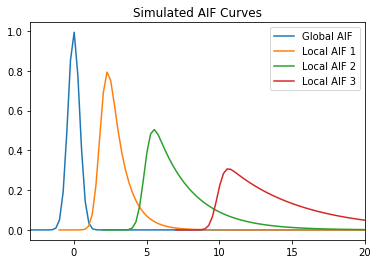

In [118]:
t = np.linspace(-3,22,100)
# Tdelay = 2s
g,x,y = AIF_DD(1,2,2)
pl.plot(t,g,label = 'Global AIF')
pl.plot(t+2,y,label = 'Local AIF 1')

#Tdelay = 5s
g,x,y = AIF_DD(1,2,5)
pl.plot(t+5,y, label = 'Local AIF 2')

#Tdelay = 15s
g,x,y = AIF_DD(1,2,10)
pl.plot(t+10,y, label = 'Local AIF 3')

pl.legend()
pl.xlim(-3,20)
pl.title('Simulated AIF Curves')
pl.show()